####Sales Case Study

#####Summary

The case study involves analysing a simulated dataset titled “Sales Case Study.csv”, which contains daily trading data for a single product sold by a large retail store. The dataset includes four key variables, Date, Sales, Cost of Sales, and Quantity Sold, the data shows the number of sales and quantity sold on a daily basis.

The objective is to use this dataset to calculate and interpret several key performance metrics, including the daily sales price per unit, average unit sales price, daily gross profit percentage, and daily gross profit per unit. Additionally, the analysis requires identifying three promotional periods to calculate the Price Elasticity of Demand (PED) and assess whether the product performs better during promotions. Finally, the task encourages deriving additional insights from the data through meaningful visualizations, reports, dashboards, or KPIs, to support data-driven decision-making and performance evaluation.

#####Import Libraries



In [0]:
#The codes below help to set up the Python environment for data analysis and visualization. It imports essential libraries such as pandas and numpy for data manipulation and numerical operations, plotly and matplotlib for creating interactive and static visualizations, and datetime for handling date and time data. It also includes configurations to display all rows and columns in data outputs and suppresses unnecessary warnings for cleaner results. Additionally, it imports tools from scikit-learn such as StandardScaler for data normalization, LocalOutlierFactor for detecting outliers, KMeans for clustering similar data points, and silhouette_score for evaluating clustering performance. Overall, this setup provides a complete foundation for performing data exploration, visualization, and basic machine learning analysis in Python.

import os
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
from pyspark.sql.functions import round, col
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score    



#####Data Ingestion

In [0]:
#Data Location
data_path = "workspace.default.sales_case_study"

#Read Data
df = spark.table(data_path)
display(df)

Date,Sales,Cost Of Sales,Quantity Sold
2013-12-30,223937.9679,230079.621,6827
2013-12-31,300345.4846,306986.1205,9268
2014-01-01,86782.46773,87986.31821,2678
2014-01-02,200173.1168,202881.1777,6175
2014-01-03,326906.0742,333806.2919,10084
2014-01-04,307043.9354,313652.3483,9470
2014-01-05,179188.8845,183083.285,5524
2014-01-06,306351.9509,313446.0681,9448
2014-01-07,224020.41,229533.9737,6911
2014-01-08,101836.4022,99381.96752,2990


#####Data Inspection

In [0]:
# Checking number of rows and columns
num_rows = df.count()
num_cols = len(df.columns)
print(f"Rows: {num_rows}, Columns: {num_cols}")


Rows: 1053, Columns: 4


In [0]:

# Get column names and data types
print(df.dtypes)

[('Date', 'date'), ('Sales', 'double'), ('Cost Of Sales', 'double'), ('Quantity Sold', 'bigint')]


In [0]:
# Checking duplicates and null values
print(df.dropDuplicates().count())
print(df.filter(df["Date"].isNull()).count())

1053
0


#####Data conversion

In [0]:
#Converting the columns names from Cost of Sales to CostOfSales and Quantity Sold to QuantitySold, checking rowsand also to round off the sales and cost of sales values to two decimal places.
from pyspark.sql.functions import to_date, col, round

sdf = df

sdf = sdf.withColumnRenamed('Cost of Sales', 'CostOfSales').withColumnRenamed('Quantity Sold', 'QuantitySold')

sdf = sdf.withColumn('Sales', round(col('Sales'), 2)).withColumn('CostOfSales', round(col('CostOfSales'), 2))

display(sdf)

Date,Sales,CostOfSales,QuantitySold
2013-12-30,223937.97,230079.62,6827
2013-12-31,300345.48,306986.12,9268
2014-01-01,86782.47,87986.32,2678
2014-01-02,200173.12,202881.18,6175
2014-01-03,326906.07,333806.29,10084
2014-01-04,307043.94,313652.35,9470
2014-01-05,179188.88,183083.29,5524
2014-01-06,306351.95,313446.07,9448
2014-01-07,224020.41,229533.97,6911
2014-01-08,101836.4,99381.97,2990


#####Create Additional Columns for Analysis

In [0]:
#Doing the calculations for question 1 to 4.

from pyspark.sql.functions import sum as spark_sum, avg, expr

# 1. Daily sales price per unit
sdf = sdf.withColumn("SalesPricePerUnit", col("Sales") / col("QuantitySold"))

# 2. Average unit sales price of this product
avg_unit_sales_price = sdf.agg(avg("SalesPricePerUnit").alias("AvgUnitSalesPrice"))
display(avg_unit_sales_price)

# 3. Daily % gross profit
sdf = sdf.withColumn("GrossProfit", col("Sales") - col("CostOfSales"))
sdf = sdf.withColumn("GrossProfitPct", (col("GrossProfit") / col("Sales")) * 100)

# 4. Daily % gross profit per unit
sdf = sdf.withColumn("GrossProfitPerUnit", col("GrossProfit") / col("QuantitySold"))
sdf = sdf.withColumn("GrossProfitPerUnitPct", (col("GrossProfitPerUnit") / col("SalesPricePerUnit")) * 100)


AvgUnitSalesPrice
37.07285154392195


#####Transformed Data

In [0]:
#Displaying the transformed data with additional columns

display(sdf)

Date,Sales,CostOfSales,QuantitySold,SalesPricePerUnit,GrossProfit,GrossProfitPct,GrossProfitPerUnit,GrossProfitPerUnitPct
2013-12-30,223937.97,230079.62,6827,32.801811923245936,-6141.649999999994,-2.7425675065287027,-0.8996118353596008,-2.7425675065287027
2013-12-31,300345.48,306986.12,9268,32.406719896417776,-6640.640000000014,-2.211000478515613,-0.7165127319810114,-2.211000478515613
2014-01-01,86782.47,87986.32,2678,32.40570201643017,-1203.8500000000058,-1.3872041208322439,-0.4495332337565369,-1.387204120832244
2014-01-02,200173.12,202881.18,6175,32.4166995951417,-2708.0599999999977,-1.3528589652796528,-0.4385522267206474,-1.3528589652796528
2014-01-03,326906.07,333806.29,10084,32.418293335977786,-6900.219999999972,-2.1107653339076795,-0.6842740975803225,-2.1107653339076795
2014-01-04,307043.94,313652.35,9470,32.422802534318905,-6608.409999999974,-2.1522684994206283,-0.6978257655754989,-2.1522684994206283
2014-01-05,179188.88,183083.29,5524,32.438247646632874,-3894.4100000000035,-2.173354730494439,-0.7049981897175965,-2.173354730494439
2014-01-06,306351.95,313446.07,9448,32.42505821337849,-7094.119999999995,-2.3156764629701216,-0.750859441151566,-2.3156764629701216
2014-01-07,224020.41,229533.97,6911,32.41504992041673,-5513.559999999998,-2.461186460644366,-0.7977948198524089,-2.461186460644366
2014-01-08,101836.4,99381.97,2990,34.05899665551839,2454.429999999993,2.4101696446457193,0.8208795986622051,2.4101696446457193


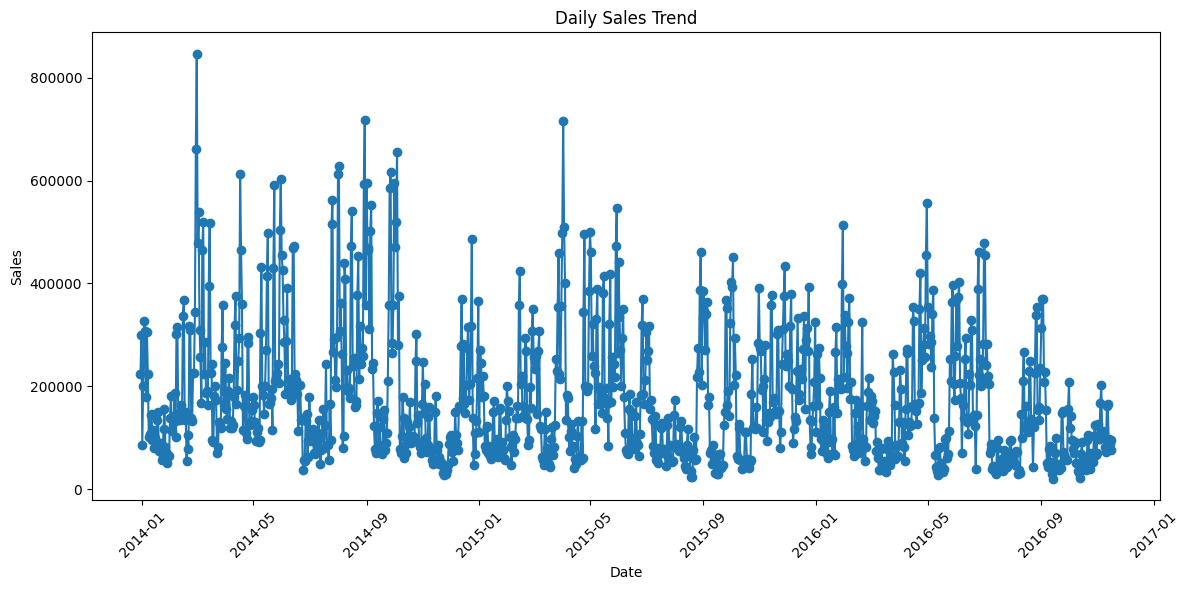

In [0]:
#Drawing the trendline graph to be able to pick any 3 periods during which this product was on promotion/special, which could be seen by hihg peack sales:
import matplotlib.pyplot as plt

pdf = sdf.select("Date", "Sales").orderBy("Date").toPandas()

plt.figure(figsize=(12,6))
plt.plot(pdf["Date"], pdf["Sales"], marker='o', linestyle='-')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Query to check the top 3 selling dates, which will help in identifying the 3 periods during which this product was on promotion/special, we can see that by those high sales.
top3_sales_dates = sdf.orderBy(col("Sales").desc()).select("Date", "Sales").limit(3)
display(top3_sales_dates)

Date,Sales
2014-03-01,846678.39
2014-08-30,717096.71
2015-04-02,715032.19


#####Price Elasticity of Demand

In [0]:
#Calculate the Price Elasticity of Demand for the 3 top selling dates
from pyspark.sql.window import Window
from pyspark.sql.functions import lag, log, col

# Get top 3 selling dates with required columns
top3 = sdf.orderBy(col("Sales").desc()).select("Date", "SalesPricePerUnit", "QuantitySold").limit(3)

# Add lag columns for price and quantity
w = Window.orderBy(col("SalesPricePerUnit").desc())
top3 = top3.withColumn("PrevPrice", lag("SalesPricePerUnit").over(w))
top3 = top3.withColumn("PrevQty", lag("QuantitySold").over(w))

# Calculate log differences
top3 = top3.withColumn("log_price_diff", log(col("SalesPricePerUnit")) - log(col("PrevPrice")))
top3 = top3.withColumn("log_qty_diff", log(col("QuantitySold")) - log(col("PrevQty")))

# Calculate elasticity for each pair (skip first row with nulls)
top3 = top3.withColumn("Elasticity", -col("log_qty_diff") / col("log_price_diff"))

# Filter out nulls and compute average elasticity
elasticity = top3.filter(col("Elasticity").isNotNull()).agg({"Elasticity": "avg"}).withColumnRenamed("avg(Elasticity)", "PriceElasticityOfDemand")

display(elasticity)

PriceElasticityOfDemand
-0.49724363726260834


#####Data Visuals

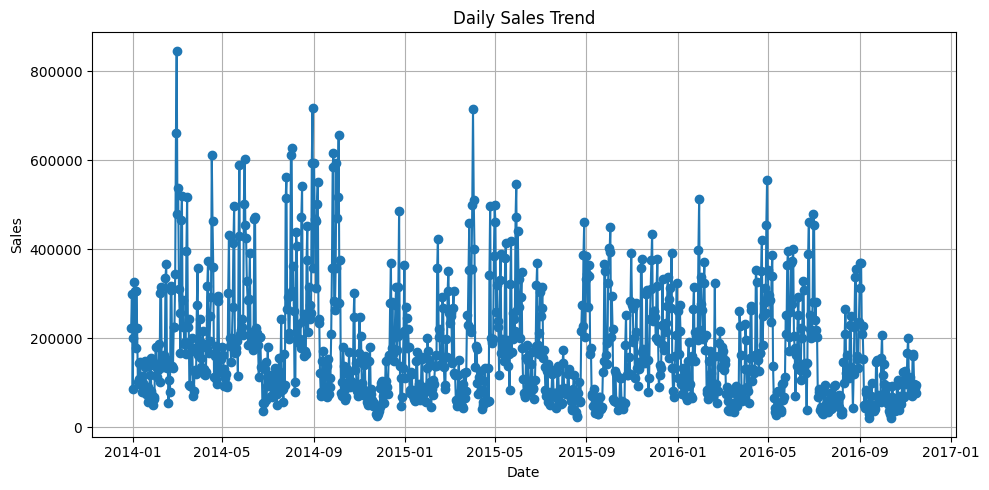

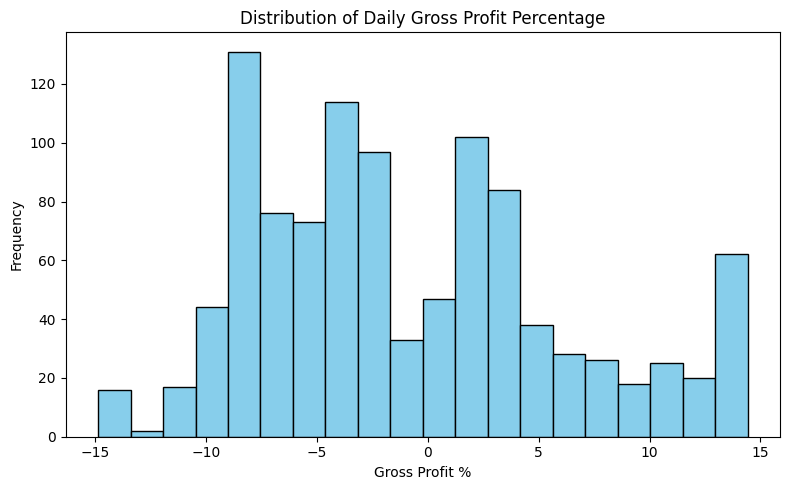

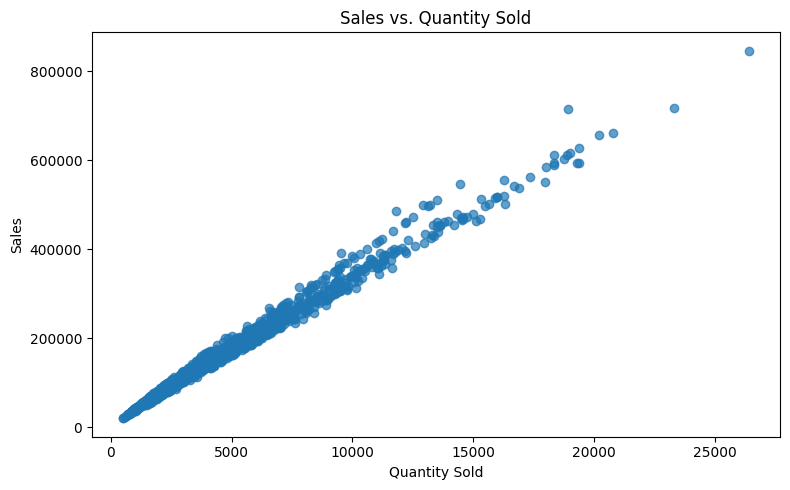

Total Sales,Total Quantity Sold,Average Gross Profit %
1.8690982813000003E8,5279872,-0.8749769104821401


Date,GrossProfit,Sales,QuantitySold
2015-12-24,27831.95000000001,392228.14,9540
2016-02-13,22002.53,172541.51,4105
2016-02-12,19256.479999999996,148839.97,3542
2015-12-23,18746.170000000013,268330.39,6534
2016-02-19,17829.24000000002,161275.6,3841


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas for plotting
pdf = sdf.toPandas()

# 1. Trend of Sales Over Time
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(pdf['Date']), pdf['Sales'], marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
display(plt.gcf())
plt.close()

# 2. Gross Profit Percentage Distribution
plt.figure(figsize=(8, 5))
plt.hist(pdf['GrossProfitPct'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Gross Profit Percentage')
plt.xlabel('Gross Profit %')
plt.ylabel('Frequency')
plt.tight_layout()
display(plt.gcf())
plt.close()

# 3. Sales vs. Quantity Sold Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(pdf['QuantitySold'], pdf['Sales'], alpha=0.7)
plt.title('Sales vs. Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales')
plt.tight_layout()
display(plt.gcf())
plt.close()

# 4. KPI Table: Total Sales, Total Quantity, Average Gross Profit %
kpi_data = {
    "Total Sales": [pdf['Sales'].sum()],
    "Total Quantity Sold": [pdf['QuantitySold'].sum()],
    "Average Gross Profit %": [pdf['GrossProfitPct'].mean()]
}
kpi_df = pd.DataFrame(kpi_data)
display(kpi_df)

# 5. Top 5 Days by Gross Profit
top5_gross_profit = pdf.nlargest(5, 'GrossProfit')[['Date', 'GrossProfit', 'Sales', 'QuantitySold']]
display(top5_gross_profit)

#####Analysis

Based on the visuals above, the analysis indicates that sales performance varies significantly across different dates, with the top three sales dates showing notably higher sales volumes and revenues. The calculated price elasticity of demand suggests that quantity sold is moderately responsive to changes in sales price per unit, indicating that pricing strategies could have a meaningful impact on sales volume. Additionally, the gross profit and gross profit percentage metrics highlight the importance of maintaining an optimal balance between sales price and cost of sales to maximize profitability. We can also observe the outliers in terms of number of quantities sold, certain days stand out as outliers with the top three days recording 20805, 23310, and 26410 units respectively.

#####Conclusion

In conclusion, this sales case study provided a comprehensive analysis of sales performance, pricing strategies, and profitability metrics using Databricks and Spark. Through data cleaning, transformation, and visualization, we identified key trends and drivers of sales, such as the impact of price on quantity sold and gross profit margins. The calculated price elasticity of demand highlighted the sensitivity of sales volume to price changes, offering actionable insights for optimizing pricing strategies. Overall, the study demonstrates the value of data-driven decision-making in enhancing sales outcomes and profitability.

Additionally, I have learned a lot working on this project in Databricks, and with more practice, I am confident I can further improve my skills and efficiency in using this platform.